![](../images/logos/KIEPSKIES.jpg)

# **Linear Regression**

## **Simple Linear Regression: Understanding, Equation, and Implementation**

<span style="color: #00008B;">**Definition and Explanation of Simple Linear Regression**</span>

Simple Linear Regression is a statistical method used to model the relationship between two variables:

- An independent variable (X)
- A dependent variable (Y)
- 
The goal of linear regression is to find the best-fitting straight line that minimizes the error between the observed values and predicted values.

Here are the Key Assumptions for a linear model:

- A linear relationship exists between X (input) and Y (output).
- The data follows homoscedasticity (constant variance of errors).
- The errors follow a normal distribution.

<span style="color: #00008B;">**The linear regression equation**</span>

Linear regression follows the equation: $$y = mx + c$$

Where: 

- $y$ is the predicted value(dependent variable).
- $x$ is the input feature(independent variable).
- $m$ is the slope(rate of change of Y with respect to X)
- $c$ is the intercept(value of Y when X = 0)

However, this is not always the case in real life. There is always an unexplained error referred as random error denoted by $\epsilon$. Rewriting the equation, therefore; $$y = mx + c + \epsilon$$

<span style="color: #00008B;">**Real-World Example of Simple Linear Regression**</span>

Imagine we want to predict a student’s exam score (Y) based on the number of hours they study (X).

From data collection, we observe that as study hours increase, exam scores increase linearly. We can use simple linear regression to find the equation that predicts the exam score given the hours studied.

<span style="color: #00008B;">**Implementing Linear Regression from Scratch**</span>

Let's implement a simple linear regression model using Python.

In [1]:
# Load the required libraries 
import numpy as np
from matplotlib import pyplot as plt 

# Supress future warnings
import warnings
warnings.filterwarnings("ignore")

We want an equation of $y = 3X - 5$, lets begin by generating the X values

In [2]:
# Generate the X values
X = np.linspace(0, 100)

We will generate alongside the random error

In [3]:
# Generate y values from equation y = 3x-5
y = []

for ix in X: 
    # Calculate a value of y in each value in X
    random_error = 5 * np.random.randn() #introduce an error
    iy = 3*ix - 5 + random_error
    y.append(iy)

Lets plot the generated data; $X$ against $y$. 

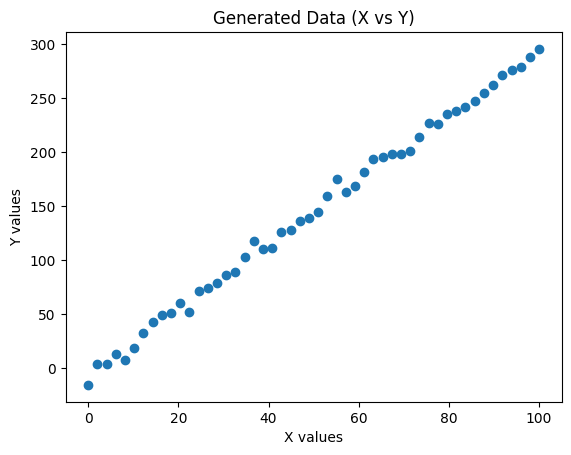

In [4]:
# Plot scatter chart of generated data
plt.scatter(X, y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Generated Data (X vs Y)")
plt.show()

<span style="color: #00008B;">**Find the Best-Fit Line using scikit-learn**</span>

Scikit(`sklearn`) has a function called `LinearRegression()` that is used to find the equation of the best fit line. 

In [5]:
# Find best fit line 
from sklearn.linear_model import LinearRegression

# Create an object of linear regression model
lnReg = LinearRegression()

# Fit a linear regression model
X = np.array(X).reshape(-1, 1)
lnReg.fit(X,y)

LinearRegression()

The model finds the best m (slope) and c (intercept) that minimize the error.

In [6]:
m = lnReg.coef_[0]
m

np.float64(3.0047302415868073)

In [7]:
c = lnReg.intercept_
c

np.float64(-5.917162197852434)

<span style="color: #00008B;">**Recreate the Best-Fit Line**</span>

Using the found values of $m$ and $c$, we compute the predicted values.


In [8]:
# Best fit line
y1 = [] # Generate the predicted y values

# recreate equation y = 3x-5
# Calculate each value of y which is iy
for ix in X:
    iy = m*ix + c 
    y1.append(iy)

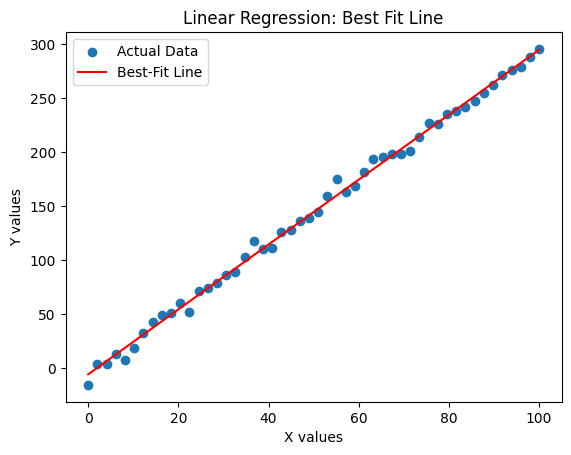

In [9]:
# Plot original data alongside the best-fit line
plt.scatter(X, y, label="Actual Data")  # Actual points
plt.plot(X, y1, color="red", label="Best-Fit Line")  # Regression line
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Linear Regression: Best Fit Line")
plt.legend()
plt.show()

## **Multiple Linear Regression: Explanation, Equation, and Implementation**
<span style="color: #00008B;">**Definition and Explanation of Multiple Linear Regression**</span>

Multiple Linear Regression is an extension of simple linear regression where the model predicts a dependent variable ($y$) using two or more independent variables($x_1, x_2, ..., x_n$)

Unlike simple linear regression, which fits a straight line to a single predictor, multiple linear regression fits a hyperplane to multiple predictors.

Key Assumptions:

- A linear relationship exists between independent variables and the dependent variable.
- No multicollinearity (independent variables should not be highly correlated).
- Homoscedasticity (constant variance of errors).
- Errors follow a normal distribution.

<span style="color: #00008B;">**Real-World Example of Multiple Linear Regression**</span>

Imagine we want to predict house prices (Y) based on multiple features such as:

- Size of the house (X₁)
- Number of bedrooms (X₂)
- Distance from city center (X₃)

A multiple linear regression model can help us find the best equation that predicts house prices based on these features.

<span style="color: #00008B;">**Implementing Multiple Linear Regression from Scratch**</span>

Let's implement a multiple linear regression model using Python. We will generate the $x_1, x_2, ..., x_n$ which in this case they are; $X_1, X_2$ and $X_3$

In [10]:
# Generate independent variables (features)
X1 = np.random.randint(800, 4000, 50)  # House Size in square feet
X2 = np.random.randint(1, 5, 50)  # Number of bedrooms
X3 = np.random.randint(1, 20, 50)  # Distance from city center in km

Calculate the y value with the random error to build an equation ;

$$y = \alpha_1 X_1 + \alpha_2 X_2, + ...+ \alpha_n X_n + c + \epsilon$$

In [11]:
import pandas as pd

# Generate dependent variable (House Price)
random_error = np.random.randint(-10000, 10000, 50)  # Adding some noise
y = 500 * X1 + 10000 * X2 - 2000 * X3 + 20000 + random_error  # y = 500X1 + 10000X2 - 2000X3 + noise

# Combine into a DataFrame
data = pd.DataFrame({"Size": X1, "Bedrooms": X2, "Distance": X3, "Price": y})
print(data.head())

   Size  Bedrooms  Distance    Price
0  2113         3        18  1075417
1  1364         3        12   702883
2  1545         1        16   767268
3  2470         4         7  1287041
4  2665         2         7  1361768


Train a Multiple Linear Regression Model

In [12]:
# Define the independent (X) and dependent (y) variables
X = data[["Size", "Bedrooms", "Distance"]]  # Features
y = data["Price"]  # Target variable

# Create and fit the linear regression model
mlr = LinearRegression()
mlr.fit(X, y)

LinearRegression()

In [13]:
# Get the coefficients (slopes) and intercept
m1, m2, m3 = mlr.coef_  # Coefficients for X1, X2, X3
c = mlr.intercept_  # Intercept

# Print the equation
print(f"Multiple Linear Regression Equation: \nPrice = {m1:.2f}*Size + {m2:.2f}*Bedrooms + {m3:.2f}*Distance + {c:.2f}")

Multiple Linear Regression Equation: 
Price = 501.43*Size + 11116.18*Bedrooms + -1847.23*Distance + 12763.75


Now use the trained multiple linear regression model to predict the house prices 

In [14]:
# Predict house price for a new house with:
# Size = 2500 sqft, Bedrooms = 3, Distance = 10 km
new_house = np.array([[2500, 3, 10]])
predicted_price = mlr.predict(new_house)

print(f"Predicted House Price: ${predicted_price[0]:,.2f}")

Predicted House Price: $1,281,203.57


<span style="color: #00008B;">**Plotting on a Chart**</span>

Since we are working with Multiple Linear Regression, which involves multiple independent variables, we cannot plot it on a 2D graph as we did with Simple Linear Regression. However, we can visualize it in two ways:

3D Plot (for three independent variables).
Predicted vs Actual Plot (scatter plot for model evaluation).
I'll generate both using matplotlib and seaborn.

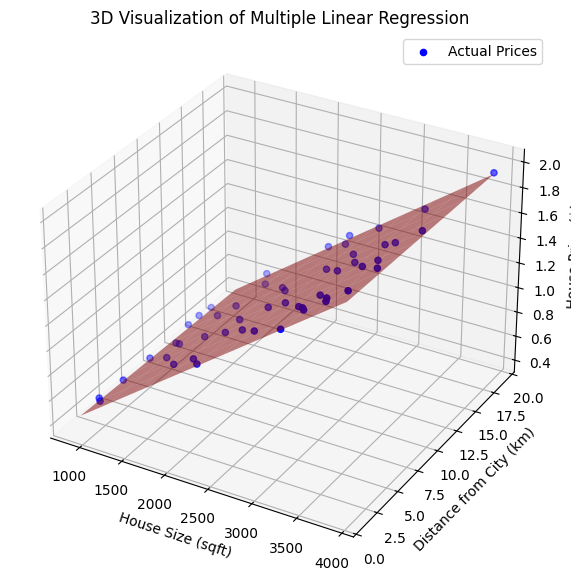

In [15]:
# 3D Plot for House Size, Distance, and Price
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot of actual values
ax.scatter(data["Size"], data["Distance"], data["Price"], color="blue", label="Actual Prices")

# Create a meshgrid for predictions
size_range = np.linspace(data["Size"].min(), data["Size"].max(), 10)
distance_range = np.linspace(data["Distance"].min(), data["Distance"].max(), 10)
size_grid, distance_grid = np.meshgrid(size_range, distance_range)

# Predict prices based on the equation
predicted_prices = m1 * size_grid + m3 * distance_grid + c

# Plot the regression surface
ax.plot_surface(size_grid, distance_grid, predicted_prices, color="red", alpha=0.5)

# Labels and title
ax.set_xlabel("House Size (sqft)")
ax.set_ylabel("Distance from City (km)")
ax.set_zlabel("House Price ($)")
ax.set_title("3D Visualization of Multiple Linear Regression")

plt.legend()
plt.show()

# **Logistic Regression**
<span style="color: #00008B;">**Introduction**</span>

Logistic Regression is a statistical method used for binary classification (i.e., when the target variable has only two possible outcomes). Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts probabilities.

<span style="color: #00008B;">**Why Not Use Linear Regression for Classification?**</span> 

- Linear Regression produces continuous values, but for classification, we need a probability.
- Logistic Regression uses the sigmoid function to convert predictions into probabilities.
- Probabilities are then mapped to class labels (e.g., 0 or 1).

<span style="color: #00008B;">**The Logistic (Sigmoid) Function**</span>

Logistic Regression is based on the sigmoid function, which maps any real number to a value between 0 and 1: $$\sigma(z) = {{1}\over{1 + e^{-z}}}$$

where: 
- $e$ is Euler's number($\approx2.718$), a fundamental constant in mathematics.
- $z$ is the linear combination of input features: $$z = w_1 X_1 + w_2 X_2 + ... + w_nX_n + b$$

The sigmoid function ensures that outputs remain between 0 and 1, making it perfect for probability estimation. 

<span style="color: #00008B;">**Euler’s Equation in Logistic Regression**</span>

Euler’s equation is one of the most beautiful equations in mathematics:
$${e^{ix}} = {cos(x) + isin(x)}$$

For logistic regression, we focus on Euler's number $e$ and how it appears in the sigmoid function:
$$\sigma(z) = {{1}\over{1 + e^{-z}}}$$

This function takes the linear regression output $z$ and converts it into a probability between 0 and 1.

- When $z$ is very large(positive) → $e^{-z}$ is close to 0 → $\sigma(z)$ is close to 1.
- When $z$ is very small (negative) → $e^{-z}$ is very large → $\sigma(z)$ is close to 0.

This is why the sigmoid function is ideal for binary classification.

Lets put this into practice: 

We have an insurance dataset, where we predict if a person buys insurance (1) or not (0) based on their age.

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

# Load dataset
df = pd.read_csv("insurance_data.csv")

Lets plot insurance against age 

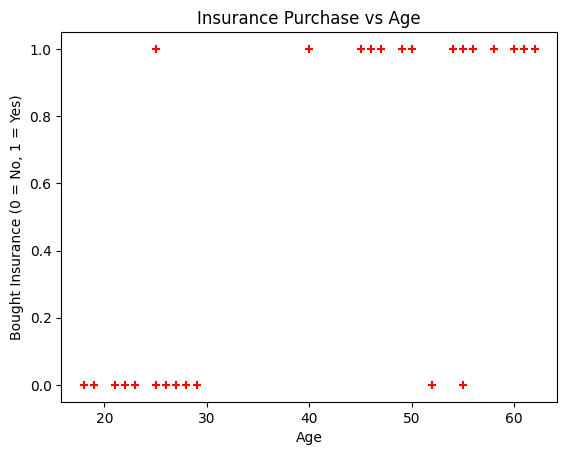

In [17]:
# Visualize data
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')
plt.xlabel("Age")
plt.ylabel("Bought Insurance (0 = No, 1 = Yes)")
plt.title("Insurance Purchase vs Age")
plt.show()

We split the dataset into training and testing sets.

In [18]:
from sklearn.model_selection import train_test_split

# Define the independent and dependent variable
X = df[['age']] # independent variable
y = df.bought_insurance # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


We therefore train our logistic regression model 

In [19]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

Then make predictions using the trained model

In [20]:
y_predicted = model.predict(X_test)
print(y_predicted)

[1 0 1 0 0 0]


Compute the model's accuracy

In [21]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


<span style="color: #00008B;">**Understanding Predictions Using Euler's Equation**</span>

Let’s manually compute predictions using the sigmoid function.

In [22]:
import math

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Prediction function
def prediction_function(age):
    z = 0.042 * age - 1.53  # Approximate coefficients
    return sigmoid(z)

# Predict for age 35
predicted_probability = prediction_function(35)
print(f"Predicted probability of buying insurance at age 35: {predicted_probability:.4f}")

Predicted probability of buying insurance at age 35: 0.4850


The model estimates $z$ using the linear equation: $$z = 0.042 X age - 1.53$$

- The sigmoid function converts this into a probability.
- If $\sigma(z)>0.05$, we classify it as 1(buys insurance).
- If $\sigma(z)<0.05$, we classify it as 0(does not buy insurance).

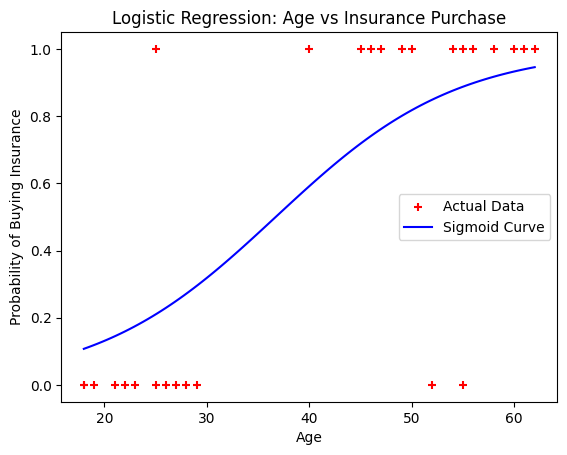

In [23]:
# Visualize data
plt.scatter(df.age, df.bought_insurance, marker='+', color='red', label="Actual Data")

# Prepare data for logistic regression
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.8, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Prediction function using model coefficients
def prediction_function(age):
    z = model.coef_[0] * age + model.intercept_
    return sigmoid(z)

# Generate ages for plotting the sigmoid curve
ages = np.linspace(df.age.min(), df.age.max(), 100)
sigmoid_values = [prediction_function(age) for age in ages]

# Plot sigmoid curve
plt.plot(ages, sigmoid_values, color='blue', label="Sigmoid Curve")

# Labels and legend
plt.xlabel("Age")
plt.ylabel("Probability of Buying Insurance")
plt.title("Logistic Regression: Age vs Insurance Purchase")
plt.legend()
plt.show()


From the plot, the logistic regression model applies a sigmoid curve to classify such that the points above the sigmoid curve **buys an insurance** and the points below the sigmoid curve **does not buy an insurance**